In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from monolayer_tracking.plot_tools import hist_median, volume_boxplot, cell_cycle_boxplot, cell_cycle_occupancy_barplot, cell_cycle_plot

sns.set_theme()

# Wild Type

In [3]:
volume_folder='RAM_dump/volumes/'
files={'ME HR 0426':'20240426 ME Treatments/WT.pkl',
       'ME 0412':'20240412 ME.pkl',
       'ME 0415_1':'20240415 ME_1.pkl',
       'ME 0415_2':'20240415 ME_2.pkl',
       'ME adhered 0520':'20240520 adhered_ME.pkl',
       'SC HR 0410':'20240410 Heather SC.pkl',
       'SC HR dil 0425':'20240425 SC treatments and ycomp bum dilutions/WT_dilution.pkl',
       'SC HR 0425':'20240425 SC treatments and ycomp bum dilutions/WT.pkl',
       'SC HR 0419':'20240419 SC treatments/WT.pkl',
       'SC 0407':'20240407 SC.pkl',
       'SC 0411':'20240411 SC.pkl'}

volumes={file:pd.read_pickle(volume_folder+files[file])[1:] for file in files}

In [ ]:
seg_folder=r'Y:\my_data/'
files={'ME adhered 0622':"Mosaic/20240622 FUCCI halo/volumes/ME.pkl",
       'SC adhered 0622':"Mosaic/20240622 FUCCI halo/volumes/SC.pkl",
       'ME 0712 adhered':'W1/20240712 FUCCI halo ME 3days adhered_suspended/volumes/adhered.pkl',
       'ME 0712 suspended':'W1/20240712 FUCCI halo ME 3days adhered_suspended/volumes/suspended2.pkl',
       'ME 0715 adhered':'W1/20240715 FUCCI halo ME 6days adhered_suspended/volumes/adhered.pkl',
       'ME 0715 suspended':'W1/20240715 FUCCI halo ME 6days adhered_suspended/volumes/suspended.pkl'
       }

volumes.update({file:pd.read_pickle(seg_folder+files[file])[1:] for file in files})

In [5]:
seg_folder=r'Y:\my_data\W1\20240713 FUCCI halo SC serum suspended\volumes/'
files={'SC low_serum':'low_serum.pkl',
       'SC high_serum':'high_serum.pkl',
       'SC WT':'ctrl.pkl'}

volumes.update({file:pd.read_pickle(seg_folder+files[file])[1:] for file in files})

In [6]:
seg_folder=r"Y:\my_data\W1\20240806-10 FUCCI halo 768k coverslip suspended\volumes/suspended/"
files={#'day1 attempt 1':'day1 attempt 1.pkl',
       'day1':'day1.pkl',
       'day2':'day2.pkl',
       'day3':'day3.pkl',
       'day4':'day4.pkl',
       'day5':'day5.pkl',
       }

volumes.update({file:pd.read_pickle(seg_folder+files[file])[1:] for file in files})

In [15]:
seg_folder=r'Y:\my_data\W1\20240809-14 FUCCI halo 300k 12-well\volumes\suspended/'
files={'day1_300k':'day1_300k.pkl',
       'day2_300k':'day2_300k.pkl',
       'day3_300k':'day3_300k.pkl',
       'day4_300k':'day4_300k.pkl',
       'day5_300k':'day5_300k.pkl',
       'day6_300k':'day6_300k.pkl',
       }

volumes.update({file:pd.read_pickle(seg_folder+files[file])[1:] for file in files})

In [7]:
plt.style.use('dark_background')

In [7]:
for label in volumes:
    if 'adhered' in label:
        for i in range(len(volumes[label])):
            is_nan=np.isnan(volumes[label][i])
            print(label, i, np.sum(is_nan))
            volumes[label][i]=volumes[label][i][~is_nan]

ME adhered 0520 0 1
ME adhered 0520 1 0
ME adhered 0520 2 0
ME adhered 0622 0 1498
ME adhered 0622 1 726
ME adhered 0622 2 90
SC adhered 0622 0 27
SC adhered 0622 1 92
SC adhered 0622 2 27
ME 0712 adhered 0 357
ME 0712 adhered 1 206
ME 0712 adhered 2 121
ME 0715 adhered 0 659
ME 0715 adhered 1 2
ME 0715 adhered 2 0


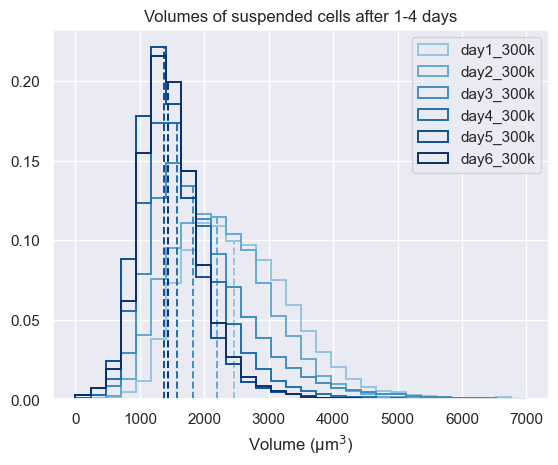

In [21]:
#labels=['day1', 'day2', 'day3', 'day4', 'day5']
# import linear segmented colormap
from matplotlib.colors import LinearSegmentedColormap

#cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'blue', 'violet'])
cmap=plt.cm.Blues
colors=cmap(np.linspace(0.4, 1, len(labels)))
for label, color in zip(labels, colors):
    hist_median(np.concatenate(volumes[label]), bins=30, range=(0,7000), color=color, label=label, linewidth=1.4, alpha=1)

plt.legend()
plt.xlabel('Volume (μm$^3$)')
plt.title('Volumes of suspended cells after 1-4 days')
#plt.grid(alpha=0.2, linestyle='--')
plt.savefig(r'plots\Aug2024 adhered_suspended\12well\suspended\volume_hist.jpg', dpi=300)

In [9]:
labels=['day1_300k', 'day2_300k', 'day3_300k', 'day4_300k', 'day5_300k', 'day6_300k']

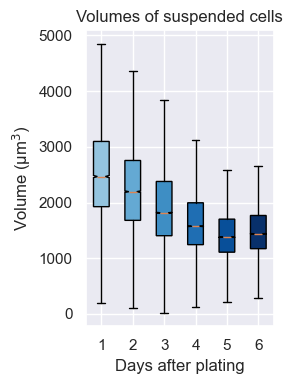

In [20]:
#colors=np.concatenate([[[0.5,0.5,0.5,1],[0.5,0.5,0.5,1]],plt.cm.viridis(np.linspace(0, 1, len(labels)-2))])

plt.figure(figsize=(3,4))

bp=plt.boxplot([np.concatenate(volumes[label]) for label in labels], labels=np.arange(1,7), patch_artist=True, showfliers=False, notch=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

#plt.xticks(rotation=60)
plt.xlabel('Days after plating')
plt.ylabel('Volume (μm$^3$)')
plt.title('Volumes of suspended cells')
plt.tight_layout()
#plt.grid(alpha=0.2, linestyle='--')
plt.savefig(r'plots\Aug2024 adhered_suspended\12well\suspended\volume_boxplot.jpg', dpi=300)

In [92]:
labels=['day1', 'day2', 'day3', 'day4']

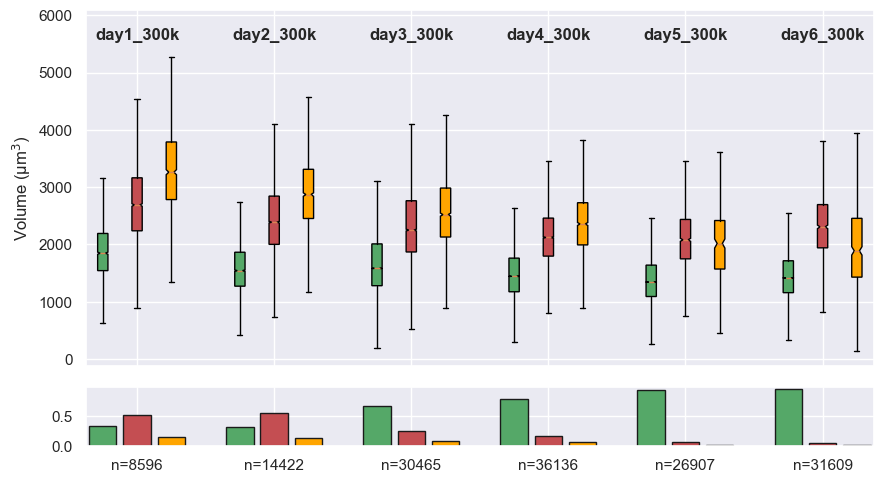

In [32]:
cc_plot(volumes, labels, figsize=(9,5), boxplot_kwargs={'WT_line':False}, barplot_kwargs={'xticks':'n'}, grid=False)
plt.tight_layout()
plt.savefig(r'plots\Aug2024 adhered_suspended\12well\suspended\volume_cc_boxplot.jpg', dpi=300)

C:\Users\Andy\AppData\Local\Temp\ipykernel_14412\3494073597.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if weights=='default':


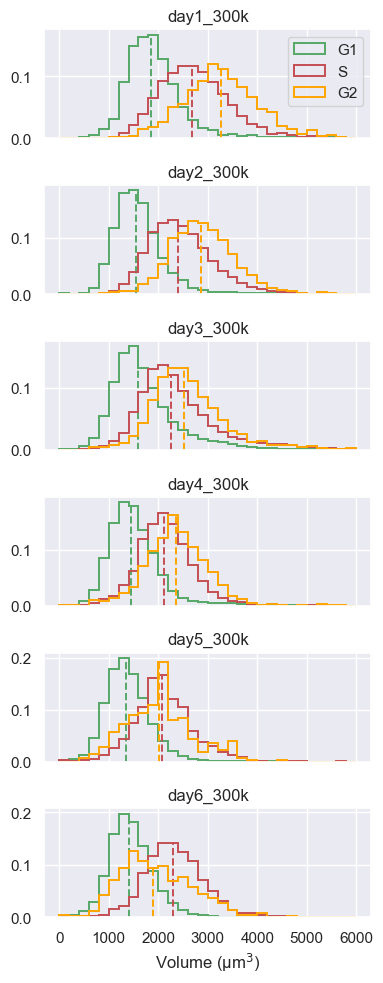

In [30]:
fig, axes=plt.subplots(len(labels),1,figsize=(4,10), sharex=True, sharey=False)
for label, ax in zip(labels, axes):
    ax.set_title(label)
    v=volumes[label]
    for cycle_v, color, label in zip(v, ['g','r','orange'], ['G1','S','G2']):
        hist_median(cycle_v, bins=30, range=(0,6000), histtype='step', color=color, weights=np.ones(len(cycle_v))/len(cycle_v), linewidth=1.4, label=label, ax=ax)

    #ax.grid(alpha=0.2, linestyle='--')

axes[0].legend()
#plt.xlim(0,8000)
plt.xlabel('Volume (μm$^3$)')
fig.tight_layout()

plt.savefig(r'plots\Aug2024 adhered_suspended\12well\suspended\volume_hist_by_cycle.jpg', dpi=300)

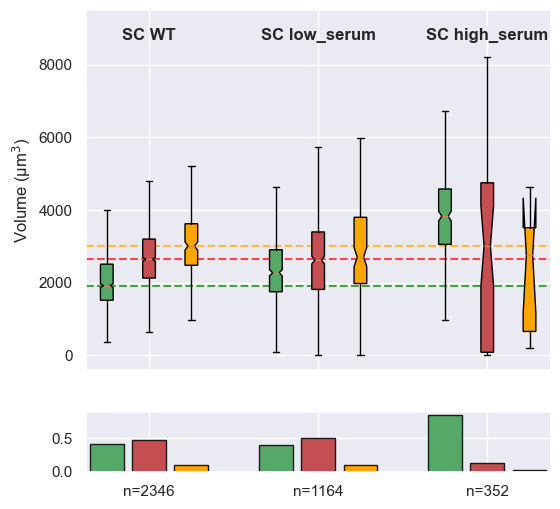

In [14]:
cc_plot(volumes, ['SC WT', 'SC low_serum', 'SC high_serum'], figsize=(6,6), boxplot_kwargs={'WT_line':True}, sharex=True)

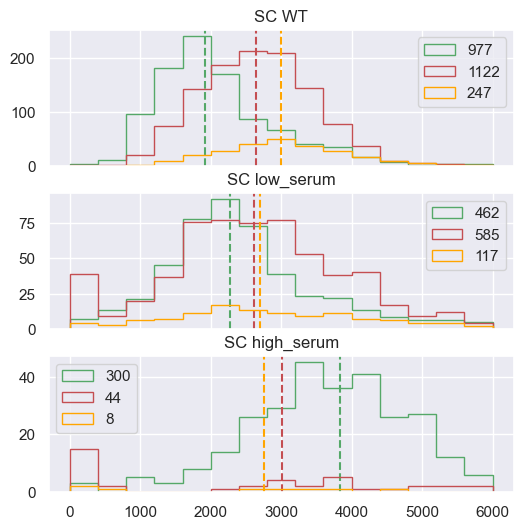

In [26]:
fig, axes=plt.subplots(3,1,figsize=(6,6), sharex=True)
for label, ax in zip(['SC WT', 'SC low_serum', 'SC high_serum'], axes):
    ax.set_title(label)
    v=volumes[label]
    for cycle_v, color in zip(v, ['g','r','orange']):
        ax.hist(cycle_v, bins=15, range=(0,6000), histtype='step', color=color, label=len(cycle_v))
        ax.axvline(np.median(cycle_v), color=color, linestyle='--')
    ax.legend()

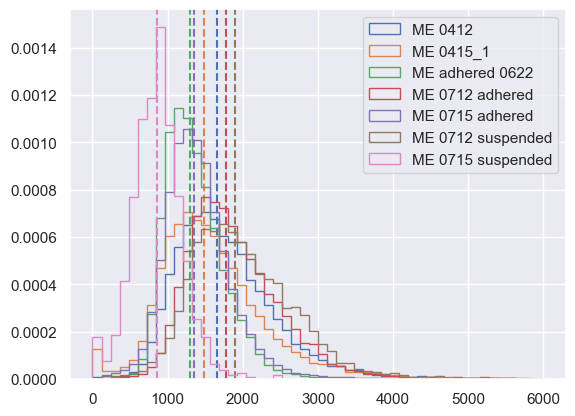

In [47]:
for i, label in enumerate(["ME 0412", "ME 0415_1", "ME adhered 0622", "ME 0712 adhered", "ME 0715 adhered", "ME 0712 suspended", "ME 0715 suspended"]):
    plt.hist(np.concatenate(volumes[label]), range=(0,6000), bins=50, density=True, label=label, histtype='step')
    plt.axvline(np.median(np.concatenate(volumes[label])), linestyle='--', color=f'C{i}')
plt.legend()

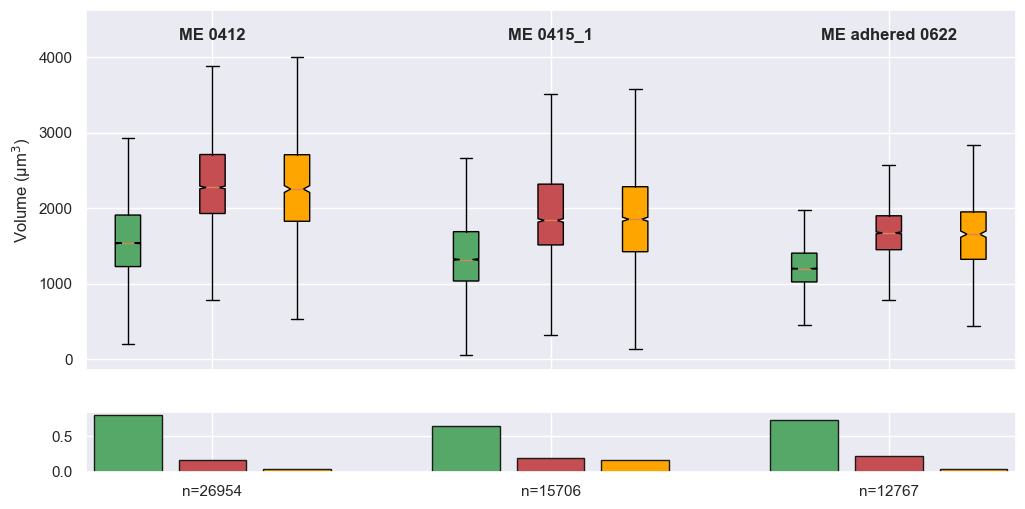

In [37]:
cc_plot(volumes, ["ME 0412", "ME 0415_1", "ME adhered 0622"], figsize=(12,6))

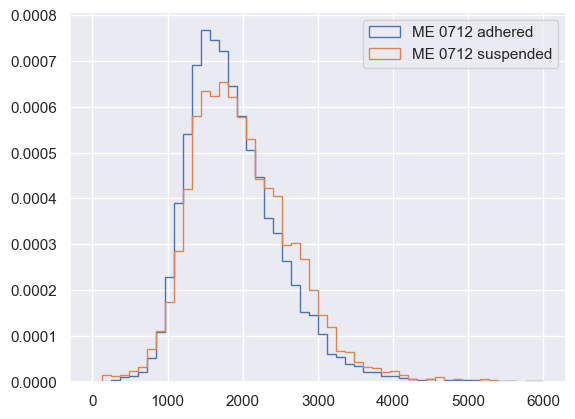

In [25]:
for volume in volumes:
    if volume.startswith('ME 0712'):
        plt.hist(np.concatenate(volumes[volume]), bins=50, range=(0,6000), alpha=1, label=volume, histtype='step', density=True)

plt.legend()

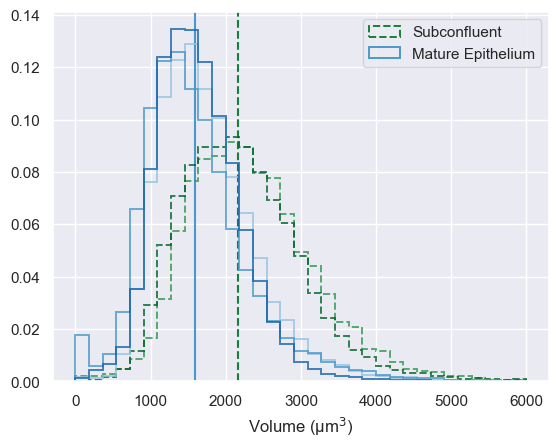

In [81]:
# Combine all volumes into a list
colors=np.concatenate([plt.cm.Greens([0.7,0.9]), plt.cm.Blues([0.4,0.6,0.8])])
for label, color in zip(['SC 0407', 'SC 0411', 'ME 0412', 'ME 0415_1', 'ME 0415_2'], colors):
    if label.startswith('SC'):
        linestyle='--'
    else:
        linestyle='-'
    values=np.concatenate(volumes[label])
    plt.hist(values, weights=np.ones(len(values))/len(values), bins=33, range=(0,6000), histtype='step', linestyle=linestyle, color=color, linewidth=1.4, alpha=0.8)

# fake legend: dashed vs. solid lines
plt.hist([], histtype='step', linestyle='--', color=plt.cm.Greens(0.8), linewidth=1.4, label='Subconfluent')
plt.hist([], histtype='step', linestyle='-', color=plt.cm.Blues(0.6), linewidth=1.4, label='Mature Epithelium')

plt.axvline(np.median(np.concatenate(volumes['SC 0407']+volumes['SC 0411'])), linestyle='--', color=plt.cm.Greens(0.8), alpha=1, zorder=1)
plt.axvline(np.median(np.concatenate(volumes['ME 0412']+volumes['ME 0415_1']+volumes['ME 0415_2'])), linestyle='-', color=plt.cm.Blues(0.6), alpha=1, zorder=1)

plt.legend(loc='upper right')
plt.xlabel('Volume (μm$^3$)')
#plt.title('Volume distribution of SC and ME cells, my data')

plt.savefig(r'C:\Users\Andy\OneDrive - The University of Chicago\UChicago\Gardel Lab\jupyter\plots\lab_meetings\24-6-21/volume_hist-suspended.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
for label in ['SC 0407', 'SC 0411', 'ME 0712 0712 0712 0412', 'ME 0415_1', 'ME 0415_2']:
    values=np.concatenate(volumes[label])
    print(label, np.nanmedian(values))

SC 0407 2251.5379816952245
SC 0411 2133.98326185228
ME 0412 1656.0915222348829
ME 0415_1 1487.3413036636355
ME 0415_2 1587.8670870247909


In [14]:
SC_median=np.nanmedian(np.concatenate(volumes['SC 0407']+volumes['SC 0411']))
ME_median=np.nanmedian(np.concatenate(volumes['ME 0412']+volumes['ME 0415_1']+volumes['ME 0415_2']))

In [15]:
SC_median/ME_median

1.355620450628496

In [9]:
print('SC', np.nanmedian(np.concatenate(volumes['SC 0407']+volumes['SC 0411'])))
print('ME', np.nanmedian(np.concatenate(volumes['ME 0412']+volumes['ME 0415_1']+volumes['ME 0415_2'])))

SC 2160.2026692883824
ME 1593.515846037041


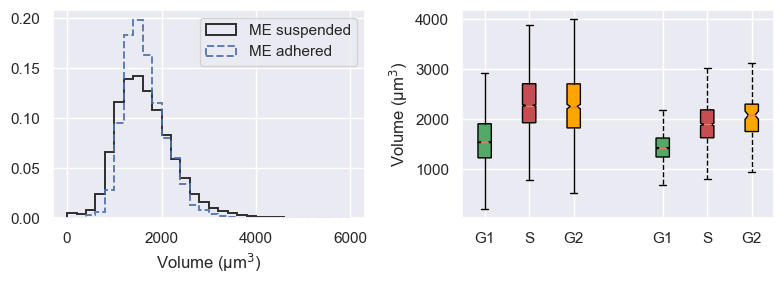

In [87]:
fig, axes=plt.subplots(1,2, figsize=(8,3))
suspended_values=np.concatenate(volumes['ME 0412']+volumes['ME 0415_1']+volumes['ME 0415_2'])
adhered_values=np.concatenate(volumes['ME adhered'])
axes[0].hist(suspended_values, bins=30, range=(0,6000), weights=np.ones_like(suspended_values)/len(suspended_values), histtype='step', linestyle='-', color='k', linewidth=1.4, alpha=0.9, label='ME suspended')
axes[0].hist(adhered_values, bins=30, range=(0,6000), weights=np.ones_like(adhered_values)/len(adhered_values), histtype='step', linestyle='--', color='C0', linewidth=1.4, alpha=0.9, label='ME adhered')
axes[0].legend(loc='upper right')
axes[0].set_xlabel('Volume (μm$^3$)')

bp=cc_boxplot(volumes, ['ME 0412', 'ME adhered'], ax=axes[1], label_n=False, label_trials=False)

plt.setp(bp[1]['whiskers'], linestyle='--')
#plt.setp(bp[1]['boxes'], edgecolor='k')
#for item in ['whiskers','caps']:
#        plt.setp(bp[1][item], color='navy')
        
axes[1].set_xticks([0,1,2,4,5,6], ['G1', 'S', 'G2', 'G1','S','G2'],rotation=0)
fig.tight_layout()

plt.savefig('plots/poster 6-3/suspended_vs_adhered.jpg', bbox_inches='tight', dpi=300)

In [113]:
help(plt.axvline)

Help on function axvline in module matplotlib.pyplot:

axvline(x: 'float' = 0, ymin: 'float' = 0, ymax: 'float' = 1, **kwargs) -> 'Line2D'
    Add a vertical line across the Axes.
    
    Parameters
    ----------
    x : float, default: 0
        x position in data coordinates of the vertical line.
    
    ymin : float, default: 0
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    ymax : float, default: 1
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    Returns
    -------
    `~matplotlib.lines.Line2D`
    
    Other Parameters
    ----------------
    **kwargs
        Valid keyword arguments are `.Line2D` properties, except for
        'transform':
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
        alpha: scala

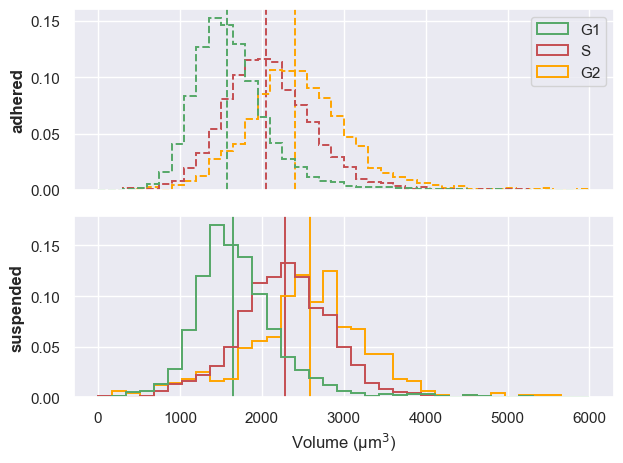

In [26]:
fig, axes=plt.subplots(2,1, sharex=True)
axes[0].set_ylabel('adhered', weight='bold')
axes[1].set_ylabel('suspended', weight='bold')
axes[1].set_xlabel('Volume (μm$^3$)')

axes[0].hist(volumes['ME 0712 adhered'], color=['g','r','orange'], linestyle='--', histtype='step', range=(0,6000), bins=40, weights=[np.ones_like(v)/len(v) for v in volumes['ME 0712 adhered']], linewidth=1.4)
axes[1].hist(volumes['ME 0712 suspended'], color=['g','r','orange'], histtype='step', range=(0,6000), bins=35, weights=[np.ones_like(v)/len(v) for v in volumes['ME 0712 suspended']], linewidth=1.4)

for v0, v1, c in zip(volumes['ME 0712 adhered'], volumes['ME 0712 suspended'], ['g','r','orange']):
    axes[0].axvline(np.nanmedian(v0), linestyle='--', zorder=1, color=c, alpha=1, linewidth=1.4)
    axes[1].axvline(np.nanmedian(v1), linestyle='-', zorder=1, color=c, alpha=1, linewidth=1.4)

# fake legend
axes[0].hist([], histtype='step', color='g', linewidth=1.4, label='G1')
axes[0].hist([], histtype='step', color='r', linewidth=1.4, label='S')
axes[0].hist([], histtype='step', color='orange', linewidth=1.4, label='G2')
axes[0].legend()

fig.tight_layout()
#plt.savefig('plots/lab_meetings/24-6-21/volume_hist-SC_ME.jpg', bbox_inches='tight',dpi=300)

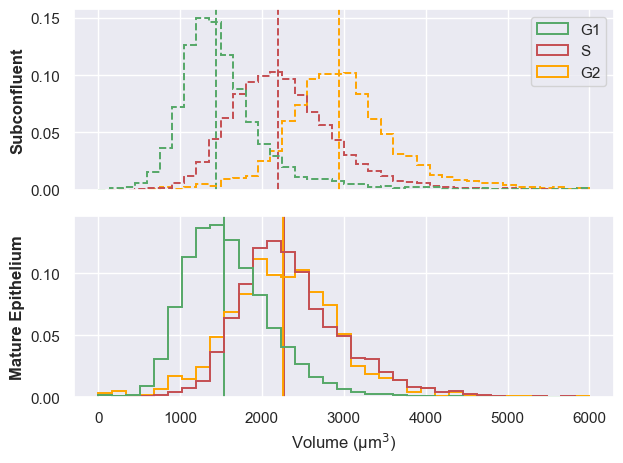

In [127]:
fig, axes=plt.subplots(2,1, sharex=True)
axes[0].set_ylabel('Subconfluent', weight='bold')
axes[1].set_ylabel('Mature Epithelium', weight='bold')
axes[1].set_xlabel('Volume (μm$^3$)')

axes[0].hist(volumes['SC 0411'], color=['g','r','orange'], linestyle='--', histtype='step', range=(0,6000), bins=40, weights=[np.ones_like(v)/len(v) for v in volumes['SC 0411']], linewidth=1.4)
axes[1].hist(volumes['ME 0412'], color=['g','r','orange'], histtype='step', range=(0,6000), bins=35, weights=[np.ones_like(v)/len(v) for v in volumes['ME 0412']], linewidth=1.4)

for v0, v1, c in zip(volumes['SC 0411'], volumes['ME 0412'], ['g','r','orange']):
    axes[0].axvline(np.nanmedian(v0), linestyle='--', zorder=1, color=c, alpha=1, linewidth=1.4)
    axes[1].axvline(np.nanmedian(v1), linestyle='-', zorder=1, color=c, alpha=1, linewidth=1.4)

# fake legend
axes[0].hist([], histtype='step', color='g', linewidth=1.4, label='G1')
axes[0].hist([], histtype='step', color='r', linewidth=1.4, label='S')
axes[0].hist([], histtype='step', color='orange', linewidth=1.4, label='G2')
axes[0].legend()

fig.tight_layout()
plt.savefig('plots/lab_meetings/24-6-21/volume_hist-SC_ME.jpg', bbox_inches='tight',dpi=300)

In [112]:
[np.median(v) for v in volumes['SC 0411']+volumes['ME 0412']]

[1442.2778511428605,
 2198.5776783217198,
 2943.1802824328197,
 1536.213446163747,
 2274.939358005996,
 2253.863910851415]

In [129]:
np.array([2274.939358005996,2253.863910851415])/1536.213446163747

array([1.48087453, 1.46715544])

(array([[0.00124948, 0.00101809, 0.00078671, 0.00152714, 0.00527558,
         0.01466981, 0.03225508, 0.05770744, 0.08112361, 0.09722801,
         0.10398445, 0.10310519, 0.09958813, 0.08302096, 0.07376556,
         0.06025267, 0.04396316, 0.03609607, 0.02748855, 0.01957518,
         0.01323523, 0.01031977, 0.00721921, 0.00541441, 0.00319311,
         0.00347078, 0.00166597, 0.00249896, 0.00134203, 0.00106437],
        [0.00181736, 0.00068151, 0.00045434, 0.00068151, 0.00454339,
         0.00613358, 0.01158564, 0.03475693, 0.06724216, 0.10245343,
         0.13562017, 0.13402999, 0.12676056, 0.10040891, 0.06678782,
         0.0542935 , 0.04452522, 0.0327124 , 0.02385279, 0.01476602,
         0.00931395, 0.00795093, 0.00477056, 0.00477056, 0.00272603,
         0.00090868, 0.00090868, 0.00045434, 0.00090868, 0.00090868],
        [0.00318134, 0.00530223, 0.00212089, 0.00106045, 0.01272534,
         0.0233298 , 0.01802757, 0.04559915, 0.0678685 , 0.09437964,
         0.11346766, 0.11240721,

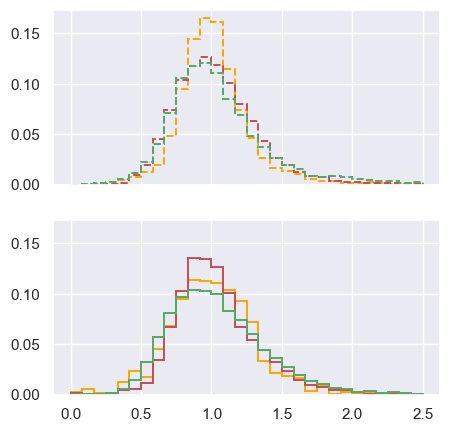

In [110]:
fig, axes=plt.subplots(2,1, figsize=(5,5), sharex=True, sharey=True)
axes[0].hist([v/np.median(v) for v in volumes['SC 0411']], color=['g','r','orange'], linestyle='--', histtype='step', range=(0,2.5), bins=30, weights=[np.ones_like(v)/len(v) for v in volumes['SC 0411']], linewidth=1.4)
axes[1].hist([v/np.median(v) for v in volumes['ME 0412']], color=['g','r','orange'], histtype='step', range=(0,2.5), bins=30, weights=[np.ones_like(v)/len(v) for v in volumes['ME 0412']], linewidth=1.4)


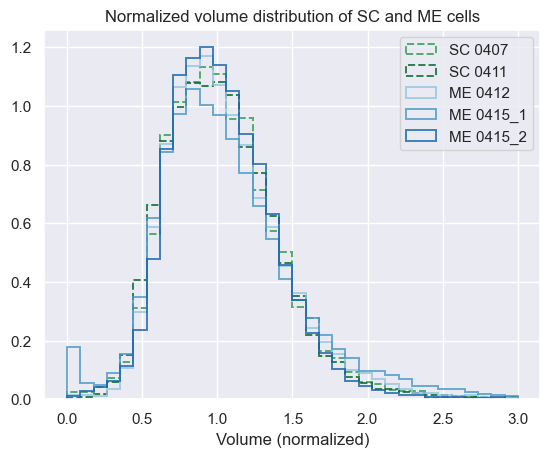

In [111]:
for label, color in zip(['SC 0407', 'SC 0411', 'ME 0412', 'ME 0415_1', 'ME 0415_2'], colors):
    if label.startswith('SC'):
        linestyle='--'
    else:
        linestyle='-'

    plt.hist(np.concatenate(volumes[label])/np.median(np.concatenate(volumes[label])), 
             bins=34, range=(0,3), density=True, histtype='step', alpha=0.8,
             linestyle=linestyle, label=label, linewidth=1.4, color=color)

plt.xlabel('Volume (normalized)')
plt.title('Normalized volume distribution of SC and ME cells')
plt.legend()

#plt.savefig('plots/volume_summary/volume_hist-all_normalized.jpg', dpi=300, bbox_inches='tight')

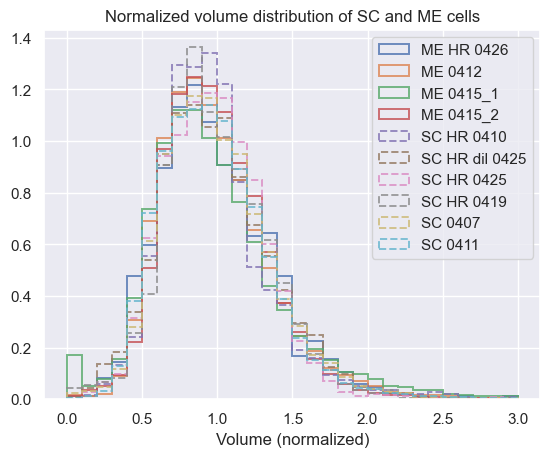

In [101]:
for label in volumes.keys():
    if label.endswith('adhered'):
        continue
    if label.startswith('SC'):
        linestyle='--'
    else:
        linestyle='-'

    plt.hist(np.concatenate(volumes[label])/np.mean(np.concatenate(volumes[label])), 
             bins=30, range=(0,3), density=True, histtype='step', alpha=0.8,
             linestyle=linestyle, label=label, linewidth=1.4)

plt.xlabel('Volume (normalized)')
plt.title('Normalized volume distribution of SC and ME cells')
plt.legend()

#plt.savefig('plots/volume_summary/volume_hist-all_normalized.jpg', dpi=300, bbox_inches='tight')

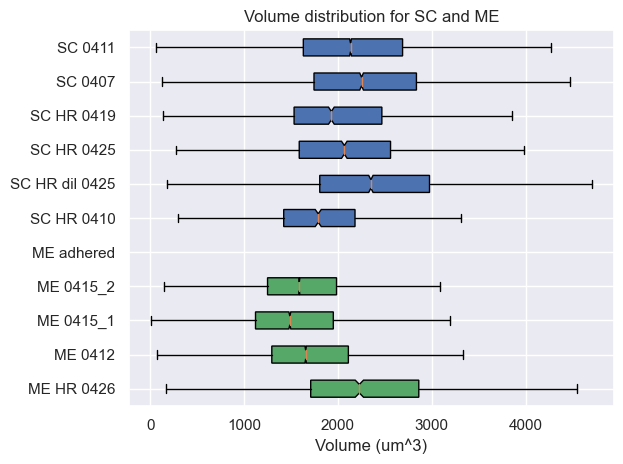

In [339]:
volume_boxplot(volumes, volumes.keys())
plt.title('Volume distribution for SC and ME')

plt.tight_layout()
plt.savefig('plots/volume_summary/volume_boxplot.jpg', dpi=300, bbox_inches='tight')

No WT labels found in the list


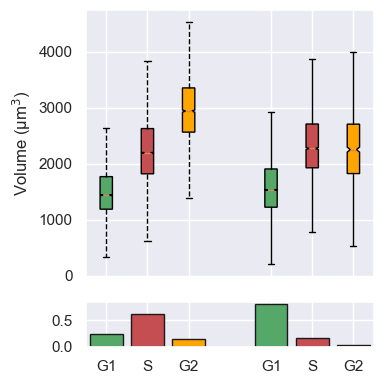

In [18]:
fig, axes=plt.subplots(2,1,figsize=(4,4), sharex=True, gridspec_kw={'height_ratios':[6,1]})
labels=['SC 0411', 'ME 0412']

#axes[0].set_title('SC treatments', weight='bold')
bp=cc_boxplot(volumes, ax=axes[0], WT_line=True, labels=labels, label_n=False, label_trials=False)
occupancy_barplot(volumes, labels, ax=axes[1], xticks='cycle')

plt.setp(bp[0]['whiskers'], linestyle='--')
fig.tight_layout()
#plt.savefig(r'plots\lab_meetings\24-6-21/volume_boxplot_by_cycle-SC treatments.jpg', dpi=300, bbox_inches='tight')

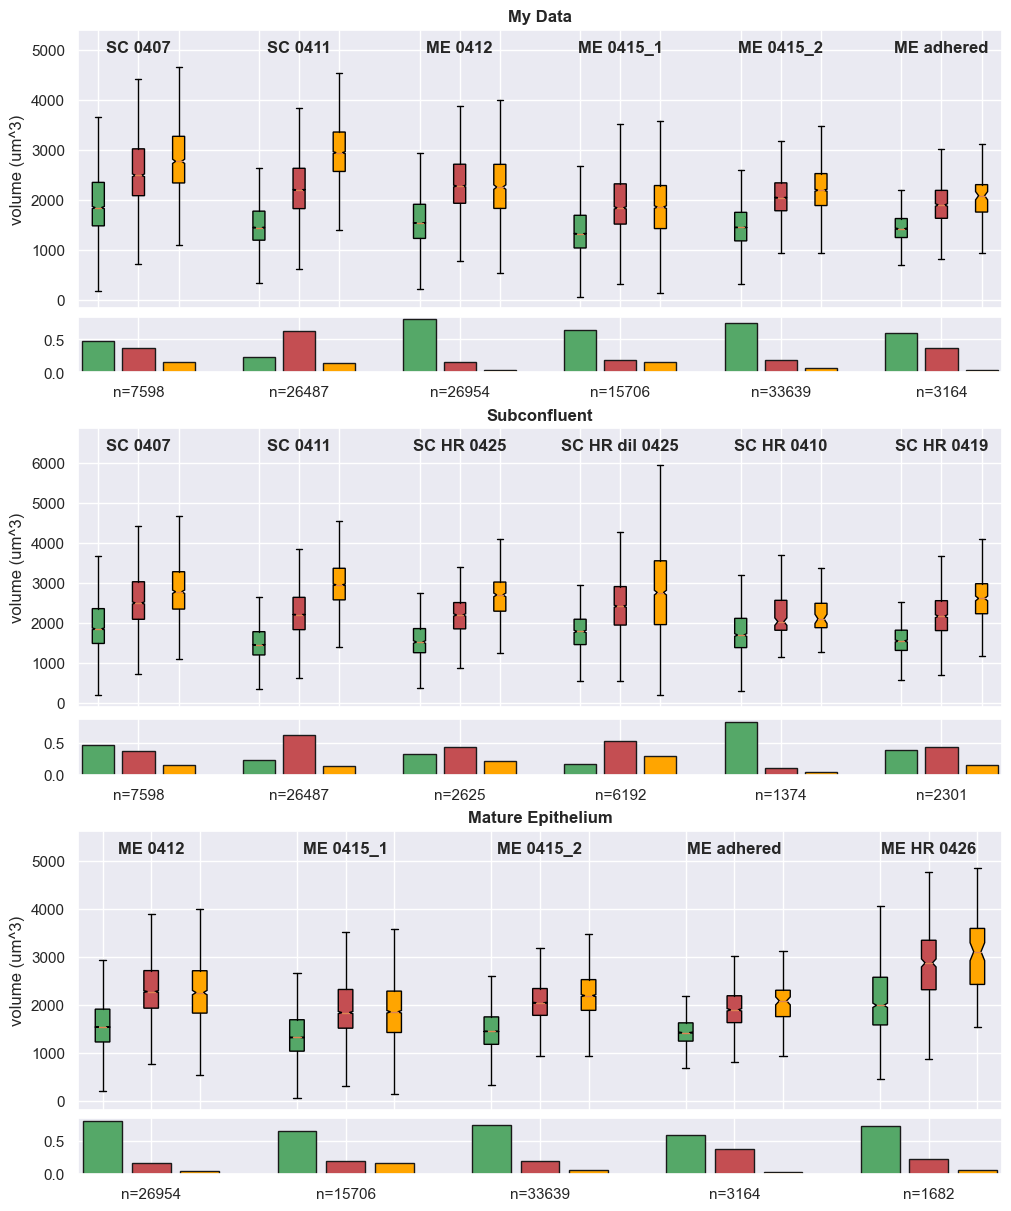

In [345]:
fig, axes=plt.subplots(6,1,figsize=(10,12), gridspec_kw={'height_ratios':[5,1,5,1,5,1]}, constrained_layout=True)

axes[0].set_title('My Data', weight='bold')
my_labels=['SC 0407', 'SC 0411', 'ME 0412', 'ME 0415_1', 'ME 0415_2', 'ME adhered']
cc_boxplot(volumes, my_labels, ax=axes[0], label_n=False)
occupancy_barplot(volumes, my_labels, ax=axes[1])
axes[1].set_xlim(axes[0].get_xlim())

SC_labels=['SC 0407', 'SC 0411', 'SC HR 0425', 'SC HR dil 0425', 'SC HR 0410', 'SC HR 0419']
cc_boxplot(volumes, SC_labels, ax=axes[2], label_n=False)
axes[2].set_title('Subconfluent', weight='bold')
occupancy_barplot(volumes, SC_labels, ax=axes[3])
axes[3].set_xlim(axes[2].get_xlim())

ME_labels=['ME 0412', 'ME 0415_1', 'ME 0415_2', 'ME adhered', 'ME HR 0426']
cc_boxplot(volumes, ME_labels, ax=axes[4], label_n=False)
axes[4].set_title('Mature Epithelium', weight='bold')
occupancy_barplot(volumes, ME_labels, ax=axes[5])
axes[5].set_xlim(axes[4].get_xlim())

plt.savefig('plots/volume_summary/volume_boxplot_by_cycle.jpg', dpi=300, bbox_inches='tight')

# Treatments

In [185]:
volume_folder='RAM_dump/volumes/'
t0419='20240419 SC treatments/'
t0425='20240425 SC treatments and ycomp bum dilutions/'
t0426='20240426 ME treatments/'
files={'SC bum 0419':t0419+'bum.pkl',
       'SC PND 0419':t0419+'PND.pkl',
       'SC rap 0419':t0419+'rapamycin.pkl',
       'SC sch77 0419':t0419+'sch77.pkl',
       'SC ycomp 0419':t0419+'ycomp.pkl',
       'SC WT 0419':t0419+'WT.pkl',
       'SC bum 0425':t0425+'bum10um.pkl',
       'SC bum33 0425':t0425+'bum33um.pkl',
       'SC 2fbs 0425':t0425+'low_serum.pkl',
       'SC rap 0425':t0425+'rapamycin.pkl',
       'SC WT dil 0425':t0425+'WT_dilution.pkl',
       'SC WT 0425':t0425+'WT.pkl',
       'SC ycomp 0425':t0425+'ycomp10um.pkl',
       'SC ycomp33 0425':t0425+'ycomp33um.pkl',
       'ME ouabain 0426':t0426+'ouabain.pkl',
       'ME phen 0426':t0426+'phenformin.pkl',
       'ME PND 0426':t0426+'pnd.pkl',
       'ME sch77 0426':t0426+'sch777.pkl',
       'ME xmu 0426':t0426+'xmu.pkl',
       'ME WT 0426':t0426+'WT.pkl'
       }

treated_volumes={file:pd.read_pickle(volume_folder+files[file])[1:] for file in files}

In [194]:
sorted_indices=np.argsort([np.median(np.concatenate(v)) for v in treated_volumes.values()])
sorted_labels=np.array(list(treated_volumes.keys()))[sorted_indices]

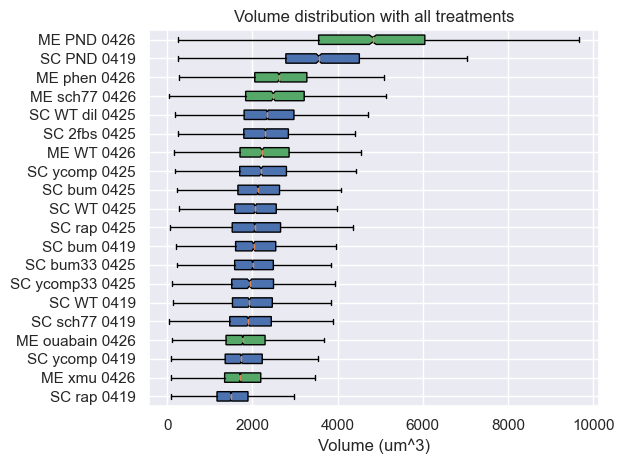

In [209]:
volume_boxplot(treated_volumes, sorted_labels)
plt.title('Volume distribution with all treatments')

plt.tight_layout()
plt.savefig('plots/volume_summary/volume_boxplot-treatments.jpg', dpi=300, bbox_inches='tight')

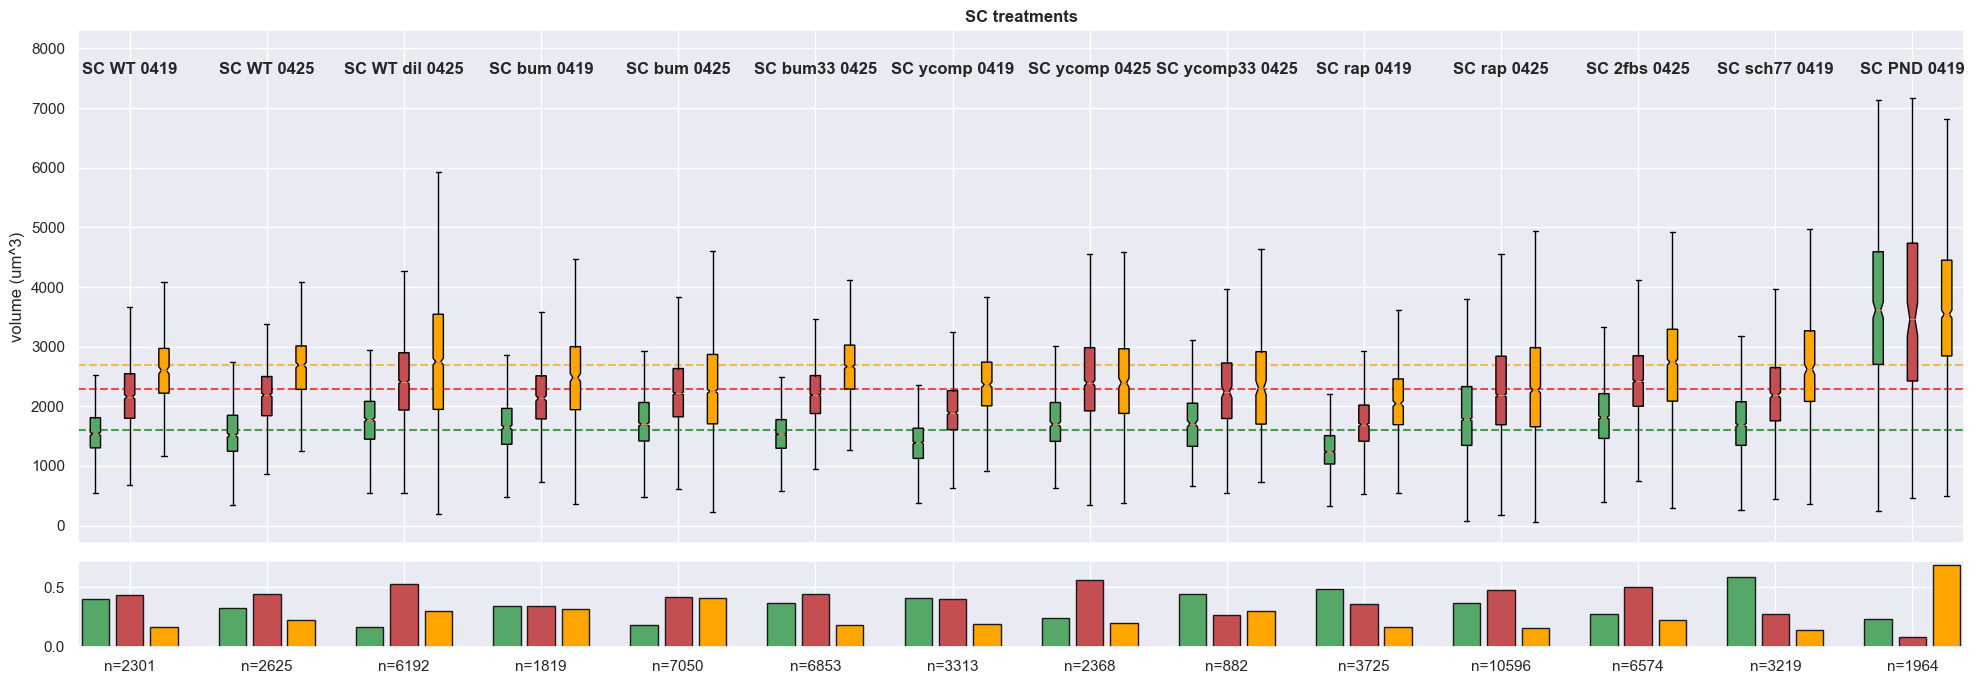

In [346]:
fig, axes=plt.subplots(2,1,figsize=(20,7), sharex=True, gridspec_kw={'height_ratios':[6,1]})
SC_labels=['SC WT 0419', 'SC WT 0425', 'SC WT dil 0425', 'SC bum 0419', 'SC bum 0425', 'SC bum33 0425', 'SC ycomp 0419', 'SC ycomp 0425', 'SC ycomp33 0425', 'SC rap 0419', 'SC rap 0425', 'SC 2fbs 0425', 'SC sch77 0419', 'SC PND 0419']

axes[0].set_title('SC treatments', weight='bold')
cc_boxplot(treated_volumes, ax=axes[0], WT_line=True, labels=SC_labels, label_n=False)
occupancy_barplot(treated_volumes, SC_labels, ax=axes[1])

fig.tight_layout()
plt.savefig('plots/volume_summary/volume_boxplot_by_cycle-SC treatments.jpg', dpi=300, bbox_inches='tight')

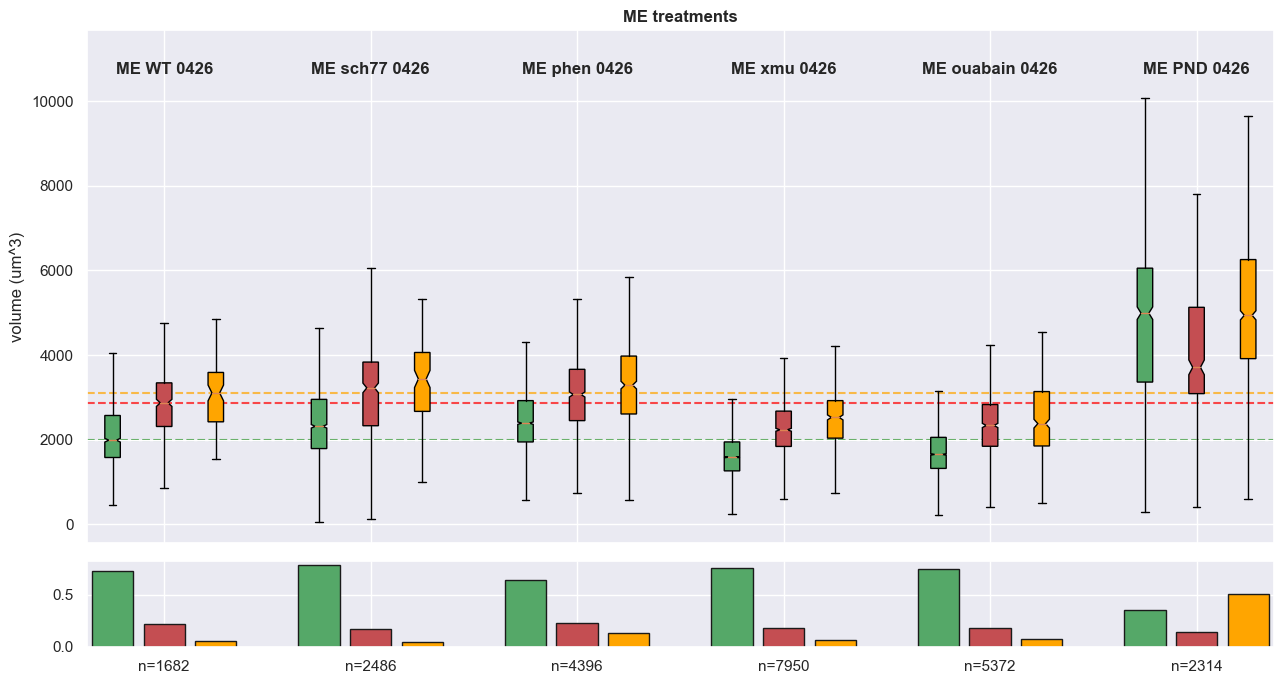

In [347]:
fig, axes=plt.subplots(2,1,figsize=(13,7), sharex=True, gridspec_kw={'height_ratios':[6,1]})
ME_labels=['ME WT 0426', 'ME sch77 0426', 'ME phen 0426', 'ME xmu 0426', 'ME ouabain 0426', 'ME PND 0426']
cc_boxplot(treated_volumes, WT_line=True, ax=axes[0], labels=ME_labels)
axes[0].set_title('ME treatments', weight='bold')
occupancy_barplot(treated_volumes, ME_labels, ax=axes[1])

fig.tight_layout()
plt.savefig('plots/volume_summary/volume_boxplot_by_cycle-ME treatments.jpg', dpi=300, bbox_inches='tight')